In [410]:
import pandas as pd

import matplotlib.pyplot as plt 

In [35]:
col_names = {'Unnamed: 0': 'feature', '0': '%'}
df_poi = pd.read_csv("../data/features/politeness/poi_emails_agg_politeness.csv").rename(columns=col_names)
df_exec = pd.read_csv("../data/features/politeness/exec_emails_agg_politeness.csv").rename(columns=col_names)
df_norm = pd.read_csv("../data/features/politeness/normal_emails_agg_politeness.csv").rename(columns=col_names)

In [36]:
df1 = df_poi.merge(df_exec, on='feature', suffixes=('_poi', '_exec'))
df = df1.merge(df_norm, on='feature').rename(columns={"%":"%_norm"})

In [37]:
df

,feature,%_poi,%_exec,%_norm
0,feature_politeness_==Please==,0.113616,0.088262,0.072931
1,feature_politeness_==Please_start==,0.082056,0.111922,0.090751
2,feature_politeness_==HASHEDGE==,0.371506,0.286014,0.266156
3,feature_politeness_==Indirect_(btw)==,0.001803,0.003440,0.002415
4,feature_politeness_==Hedges==,0.187556,0.137176,0.115523
5,feature_politeness_==Factuality==,0.032462,0.030372,0.035052
6,feature_politeness_==Deference==,0.018034,0.018122,0.011576
7,feature_politeness_==Gratitude==,0.258792,0.234248,0.199028
8,feature_politeness_==Apologizing==,0.028855,0.023660,0.022710
9,feature_politeness_==1st_person_pl.==,0.449955,0.306485,0.256141


<Axes: xlabel='feature'>

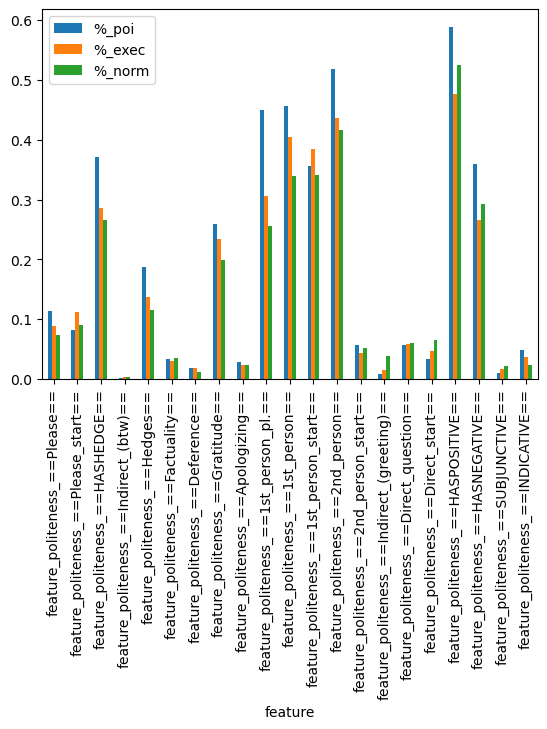

In [38]:
# plotting graph 
df.plot(x="feature", y=['%_poi', '%_exec', '%_norm'], kind="bar") 

In [100]:
df1 = pd.read_csv("../data/features/politeness/poi_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]
df2 = pd.read_csv("../data/features/politeness/exec_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]
df3 = pd.read_csv("../data/features/politeness/normal_emails.csv")[['Original Index', 'Politeness', 'Politeness Score', 'Date']]

In [101]:
poi_idx = df1['Original Index'].tolist()
exec_idx = df2['Original Index'].tolist()
norm_idx = df3['Original Index'].tolist()

dft = pd.concat([df1, df2, df3]).set_index("Original Index").sort_index()

In [102]:
dft['Datetime'] = pd.to_datetime(dft['Date'])

In [105]:
dft['Week'] = dft['Datetime'].apply(lambda x: x.week)
dft['Month'] = dft['Datetime'].apply(lambda x: x.month)
dft['Year'] = dft['Datetime'].apply(lambda x: x.year)

In [107]:
a = dft.loc[poi_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
b = dft.loc[exec_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
c = dft.loc[norm_idx, ['Politeness', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()

In [150]:
d = a.join(b, how='outer', lsuffix='_poi', rsuffix='_exec')
e = d.join(c, how='outer').rename(columns={"Politeness": "Politeness_norm"})

In [172]:
import calendar
f = e.reset_index()
f['New Month'] = f['Month'].apply(lambda x: calendar.month_abbr[x])
f = f.rename(columns={'New Month': 'Month', 'Month':'Num Month'})
f = f[[col for col in f.columns if col != 'Num Month']]

In [176]:
f = f.set_index(['Year', 'Month'])

In [183]:
f.columns

Index(['Politeness_poi', 'Politeness_exec', 'Politeness_norm'], dtype='object')

In [185]:
f = f.rename(columns={'Politeness_poi': "POI", 'Politeness_exec': "Exec", 'Politeness_norm': "Normal"})

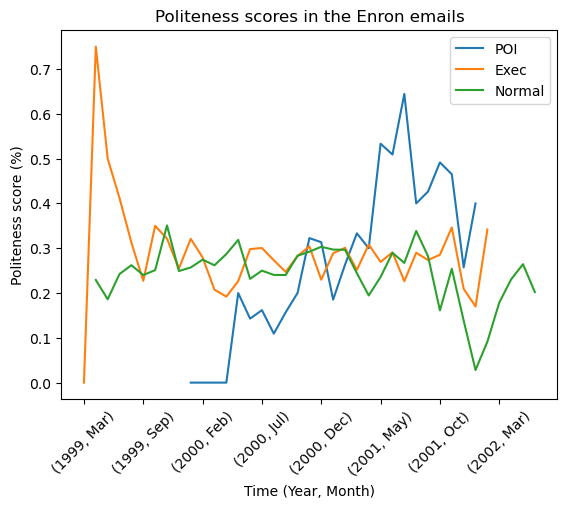

In [195]:
xlabel="Time (Year, Month)"
ylabel="Politeness score (%)"
title="Politeness scores in the Enron emails"
ax = f.plot(xlabel=xlabel, ylabel=ylabel, rot=45, title=title)
fig = ax.get_figure()
fig.savefig('q.png', pad_inches=1)
#         facecolor='auto', edgecolor='auto', backend=None,
#         **kwargs
#        )

In [381]:
df1 = pd.read_csv("../data/features/sentiment/poi_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]
df2 = pd.read_csv("../data/features/sentiment/exec_selected_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]
df3 = pd.read_csv("../data/features/sentiment/normal_selected_emails_sentiment.csv")[['Original Index', 'Sentiment', 'Sentiment Score', 'Date']]

In [382]:
poi_idx = df1['Original Index'].tolist()
exec_idx = df2['Original Index'].tolist()
norm_idx = df3['Original Index'].tolist()

dft = pd.concat([df1, df2, df3]).set_index("Original Index").sort_index()

In [383]:
dft['Datetime'] = pd.to_datetime(dft['Date'])

In [384]:
neg_idx = dft['Sentiment'] == 'NEGATIVE'

In [385]:
dft.loc[neg_idx, 'Sentiment Score'] = 1 - dft.loc[neg_idx, 'Sentiment Score']

In [386]:
dft

,Sentiment,Sentiment Score,Date,Datetime
Original Index,,,,
931,NEGATIVE,0.001229,"Tue, 12 Dec 2000 04:02:00",2000-12-12 04:02:00
2009,POSITIVE,0.996476,"Mon, 31 Dec 2001 10:53:43",2001-12-31 10:53:43
4555,POSITIVE,0.979234,"Wed, 2 May 2001 09:29:00",2001-05-02 09:29:00
5096,POSITIVE,0.998235,"Fri, 12 Oct 2001 05:45:56",2001-10-12 05:45:56
5268,NEGATIVE,0.007194,"Mon, 22 Oct 2001 06:22:25",2001-10-22 06:22:25
...,...,...,...,...
509059,POSITIVE,0.997900,"Thu, 23 Aug 2001 13:38:34",2001-08-23 13:38:34
515552,NEGATIVE,0.001843,"Wed, 30 May 2001 11:56:44",2001-05-30 11:56:44
515553,POSITIVE,0.998743,"Tue, 22 May 2001 12:53:43",2001-05-22 12:53:43


In [387]:
dft['Week'] = dft['Datetime'].apply(lambda x: x.week)
dft['Month'] = dft['Datetime'].apply(lambda x: x.month)
dft['Year'] = dft['Datetime'].apply(lambda x: x.year)

In [388]:
a = dft.loc[poi_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
b = dft.loc[exec_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()
c = dft.loc[norm_idx, ['Sentiment Score', 'Month', 'Year']].groupby(by=['Year', 'Month']).mean()

In [389]:
d = a.join(b, how='outer', lsuffix='_poi', rsuffix='_exec')
e = d.join(c, how='outer').rename(columns={"Sentiment Score": "Sentiment Score_norm"})

In [390]:
import calendar
f = e.reset_index()
f['New Month'] = f['Month'].apply(lambda x: calendar.month_abbr[x])
f = f.rename(columns={'New Month': 'Month', 'Month':'Num Month'})
f = f[[col for col in f.columns if col != 'Num Month']]

In [391]:
f = f.set_index(['Year', 'Month'])

In [392]:
f = f.rename(columns={'Sentiment Score_poi': "POI", 'Sentiment Score_exec': "Exec", 'Sentiment Score_norm': "Normal"})

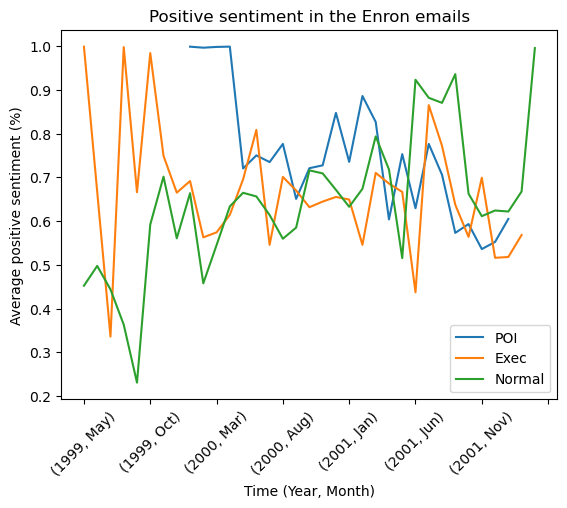

In [409]:
xlabel="Time (Year, Month)"
ylabel="Average positive sentiment (%)"
title="Positive sentiment in the Enron emails"
ax = f[[col for col in f.columns if col != "JJ"]].plot(xlabel=xlabel, ylabel=ylabel, title=title, rot=45)

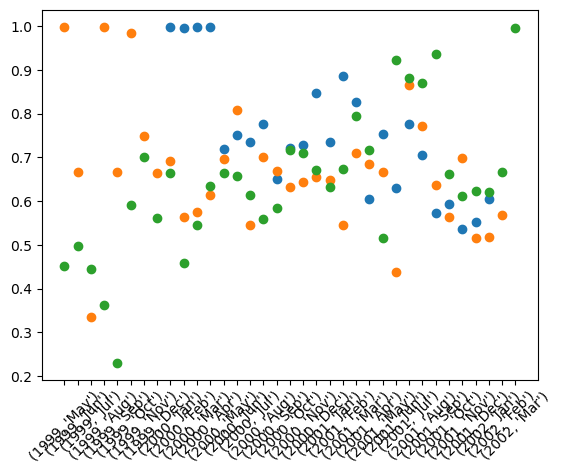

In [407]:
x = [str(i) for i in f.index]
y1 = f['POI']
y2 = f['Exec']
y3 = f['Normal']

plt.xticks(rotation=45)
# plt.xticks([x[i] for i in range(0, len(x), 2)])
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)